In [7]:
# Creating a figure
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

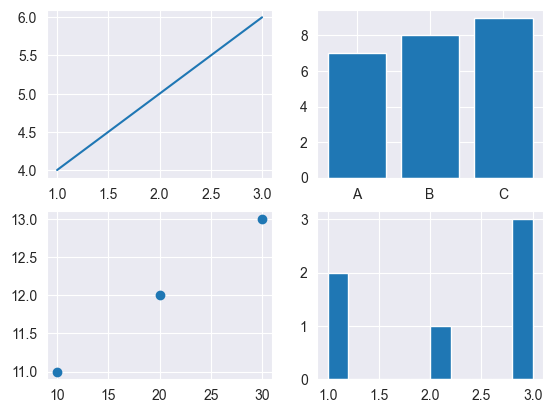

In [8]:
# Creating subplots

# Creating a figure with 2 rows and 2 columns of subplots
fig, ax = plt.subplots(2, 2)

# Access individual subplots using indexing
ax[0, 0].plot([1,2,3], [4, 5, 6]) # Top-left subplots
ax[0, 1].bar(["A","B", "C"], [7,8,9]) # Top-right subplots
ax[1, 0].scatter([10, 20, 30], [11, 12, 13]) # Bottom-left subplot
ax[1, 1].hist([1,1,2,3,3,3]) # Bottom-right subplot

plt.show()




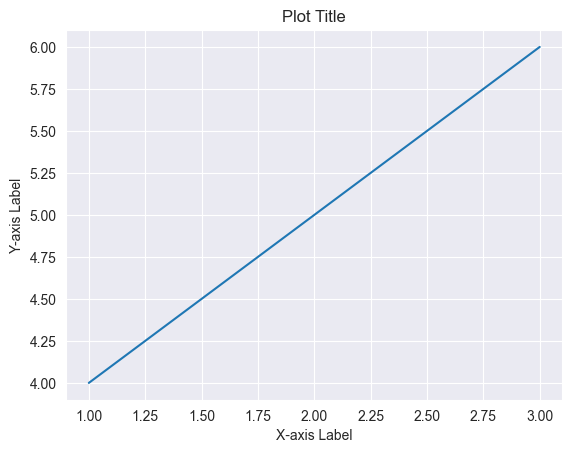

In [9]:
# Adding labels and title

x = [1, 2, 3]
y = [4, 5, 6]

plt.plot(x, y)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Plot Title")
plt.show()

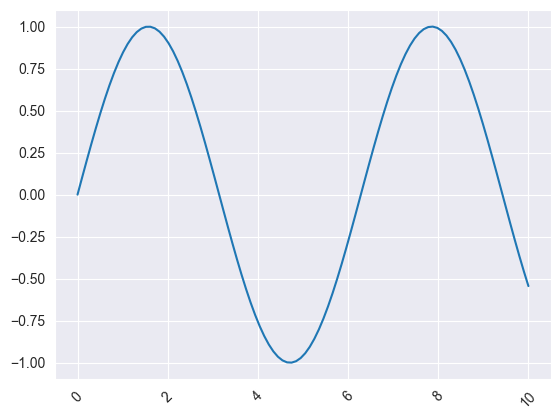

In [10]:
# Customizing ticks and tick labels

import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)

# Set tick locations and labels for the x-axis
plt.xticks(np.arange(0, 11, 2), ['0', '2', '4', '6', '8', '10'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


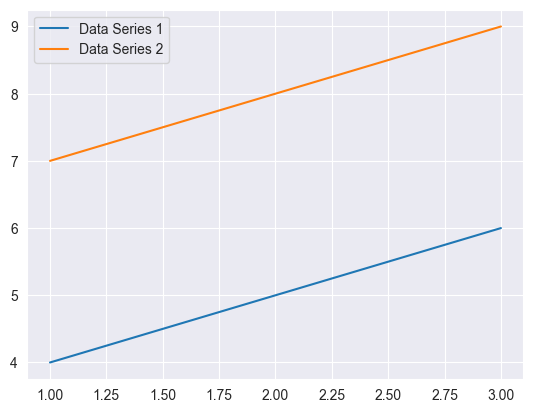

In [11]:
# Adding a legend

x = [1, 2, 3]
y1 = [4, 5, 6]
y2 = [7, 8, 9]

plt.plot(x, y1, label ='Data Series 1')
plt.plot(x, y2, label ='Data Series 2')

plt.legend()  # Automatically create a legend based on labels
plt.show()

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def f(mu):
    X = stats.norm(loc=mu, scale=np.sqrt(mu))
    N = stats.poisson(mu)
    x = np.linspace(0, X.ppf(0.999))
    n = np.arange(0, x[-1])

    fig, ax = plt.subplots()
    ax.plot(x, X.pdf(x), color ='black', lw=2, label="Normal($mu=%d, \sigma^2=%d$)" % (mu, mu))
    ax.bar(n, N.pmf(n), align='edge', label=r"Poisson($\lamba=%d$)" % mu)
    ax.set_xlim(0,X.pdf(x).max() * 1.25 )
    ax.legend(loc=2, ncol=2)
    plt.close(fig)
    return fig


In [14]:
from ipywidgets import interact
import  ipywidgets as widgets

In [15]:
interact(f, mu=widgets.FloatSlider(min=1.0, max=20.0, step=1.0));

interactive(children=(FloatSlider(value=1.0, description='mu', max=20.0, min=1.0, step=1.0), Output()), _dom_c…

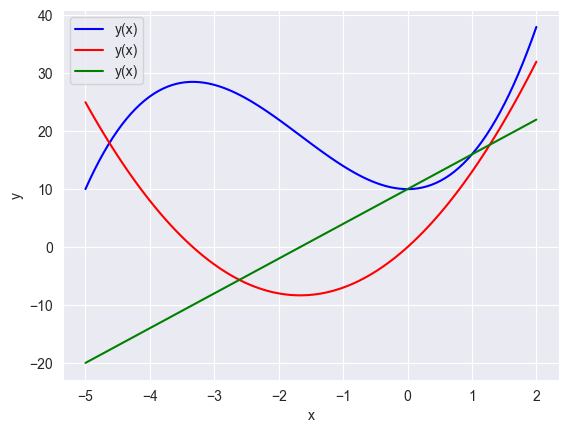

In [17]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

fig, ax = plt.subplots()
ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y(x)")
ax.plot(x, y3, color="green", label="y(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

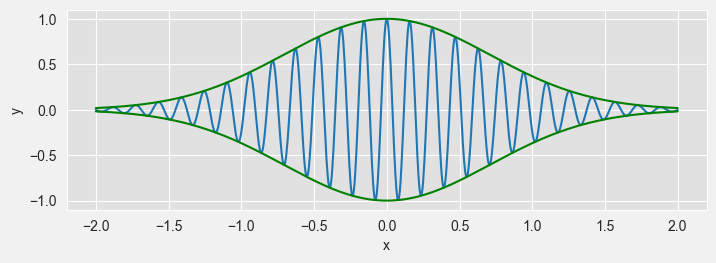

In [19]:
fig = plt.figure(figsize=(8, 2.5), facecolor='#f1f1f1')

# axes coordinates as fractions of the canvas width and height
left, bottom, width , height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor='#e1e1e1')

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("graph.png", dpi=100, facecolor='#f1f1f1')






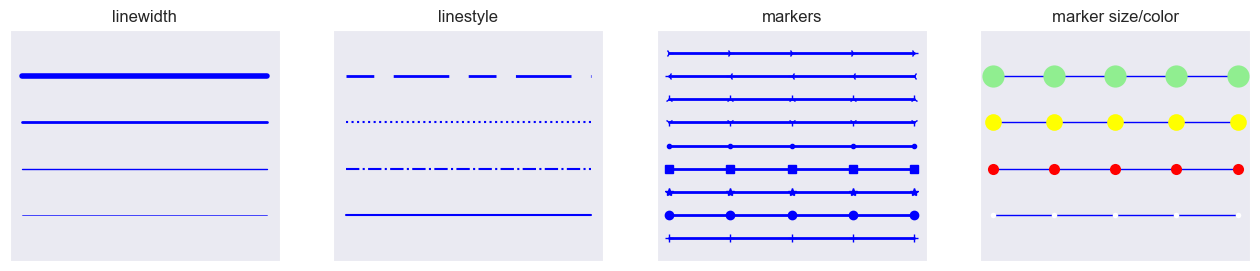

In [23]:

x = np.linspace(-5, 5, 5)
y = np.ones_like(x)

def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax + 1)
    ax.set_title(title)

fig, axes = plt.subplots(1, 4, figsize=(16, 3))

# 1) Line width
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y + n, color='blue', linewidth=linewidth)

axes_settings(fig, axes[0], "linewidth", len(linewidths))


# 2) Line style
linestyles = ['-', '-.', ':']
for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y + n, color='blue', linestyle=linestyle)

# custom dash style
line, = axes[1].plot(x, y + 3, color='blue', lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])

axes_settings(fig, axes[1], "linestyle", len(linestyles) + 1)


# 3) Marker types
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    axes[2].plot(x, y + n, color='blue', lw=2, ls='-', marker=marker)

axes_settings(fig, axes[2], "markers", len(markers))


# 4) Marker size + color
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(
        x, y + n,
        color='blue', lw=1, ls='-', marker='o',
        markersize=markersize,
        markerfacecolor=markerfacecolor,
        markeredgewidth=0
    )

axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))




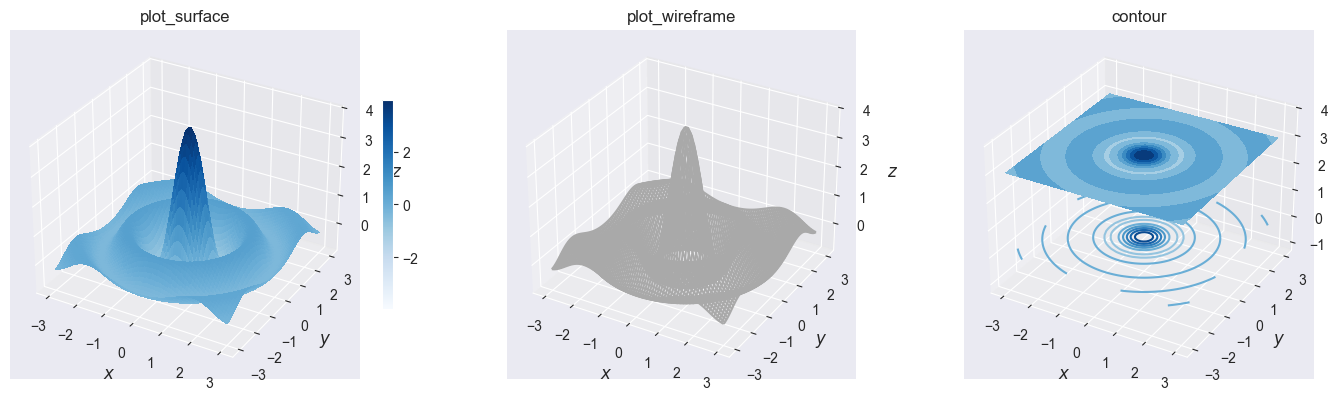

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D   # needed for 3D projection

fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=12)
    ax.set_ylabel("$y$", fontsize=12)
    ax.set_zlabel("$z$", fontsize=12)

x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R
Z[np.isnan(Z)] = 0   # fix divide-by-zero at center

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

# --- Surface plot ---
p = axes[0].plot_surface(
    X, Y, Z,
    rstride=1, cstride=1,
    linewidth=0, antialiased=False,
    cmap=mpl.cm.Blues, norm=norm
)
cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot_surface")

# --- Wireframe ---
axes[1].plot_wireframe(
    X, Y, Z,
    rstride=1, cstride=1,
    color='darkgrey'
)
title_and_labels(axes[1], "plot_wireframe")

# --- Contour + Contour fill ---
axes[2].contour(
    X, Y, Z,
    zdir='z', offset=0,
    cmap=mpl.cm.Blues, norm=norm
)
axes[2].contourf(
    X, Y, Z,
    zdir='z', offset=3,
    cmap=mpl.cm.Blues, norm=norm
)
title_and_labels(axes[2], "contour")

plt.tight_layout()
plt.show()
